In [2]:
import torch.utils
import torch.utils.data
import torch.utils.data.dataset
import torchvision
import numpy as np
from torch.utils.data import TensorDataset
import torch
from utils.inputdata import InputData
import random
from utils.runner import Runner
import torch.utils
import torch.utils.data
from models.som import SOM
import models.som
import torch
import matplotlib.pyplot as plt
from utils.inputdata import InputData
import argparse
import wandb
import random
from abc import ABC, abstractmethod
from typing import Any
import importlib
importlib.reload(models.som)
from models.som import SOM
from models.stm import STM
import math
import os

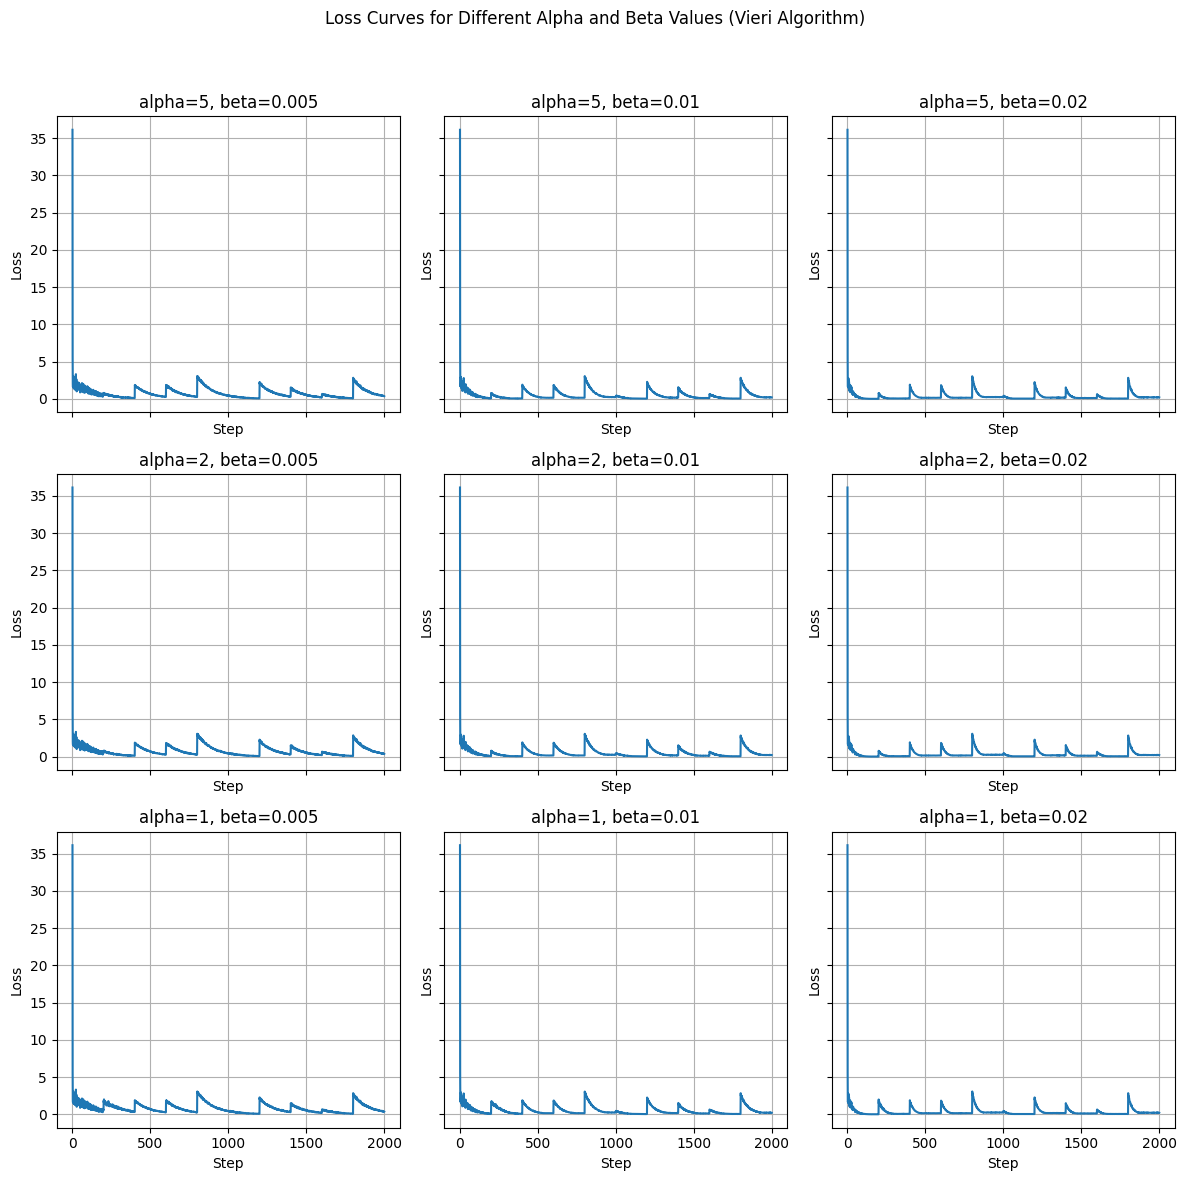

Loss curves grid saved as 'loss_curves_grid.png'


In [63]:
import wandb
import numpy as np
import matplotlib.pyplot as plt

# Define alphas and betas
alphas = [5, 2, 1]
betas = [0.005, 0.01, 0.02]

# Initialize API
api = wandb.Api()

# Set entity and project
entity = "replearn"
project = "STM-MNIST"

# Create a 3x3 grid of subplots for loss curves
fig, axes = plt.subplots(len(alphas), len(betas), figsize=(12, 12), sharex=True, sharey=True)
fig.suptitle("Loss Curves for Different Alpha and Beta Values (Vieri Algorithm)")

# Iterate over alphas and betas to populate each subplot
for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        # Define filters for current alpha and beta
        filters = {
            "config.BETA": beta,
            "config.ALPHA": alpha,
            "config.MODE": "STC",
            "config.SIGMA_BASELINE": 2,
            "state": "finished"
        }
        
        # Fetch the runs that match the filters
        runs = api.runs(
            path=f"{entity}/{project}",
            filters=filters,
            order="-created_at"
        )
        
        # Use only the first run that matches the filters
        for run in runs:
            # Collect loss data
            history_losses = run.scan_history(keys=["loss"], page_size=1000, min_step=0, max_step=2000)
            losses = [row["loss"] for row in history_losses]  # Loss values
            steps = [i for i in range(len(losses))]  # Step numbers
            
            # Plot loss on the respective subplot
            ax = axes[i, j]
            ax.plot(steps, losses, label=f"alpha={alpha}, beta={beta}")
            ax.set_title(f"alpha={alpha}, beta={beta}")
            ax.set_xlabel("Step")
            ax.set_ylabel("Loss")
            ax.grid(True)
            
            # Break after the first matching run
            break

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
plt.savefig("loss_curves_grid_Vieri.png", dpi=300)
plt.show()

print("Loss curves grid saved as 'loss_curves_grid.png'")


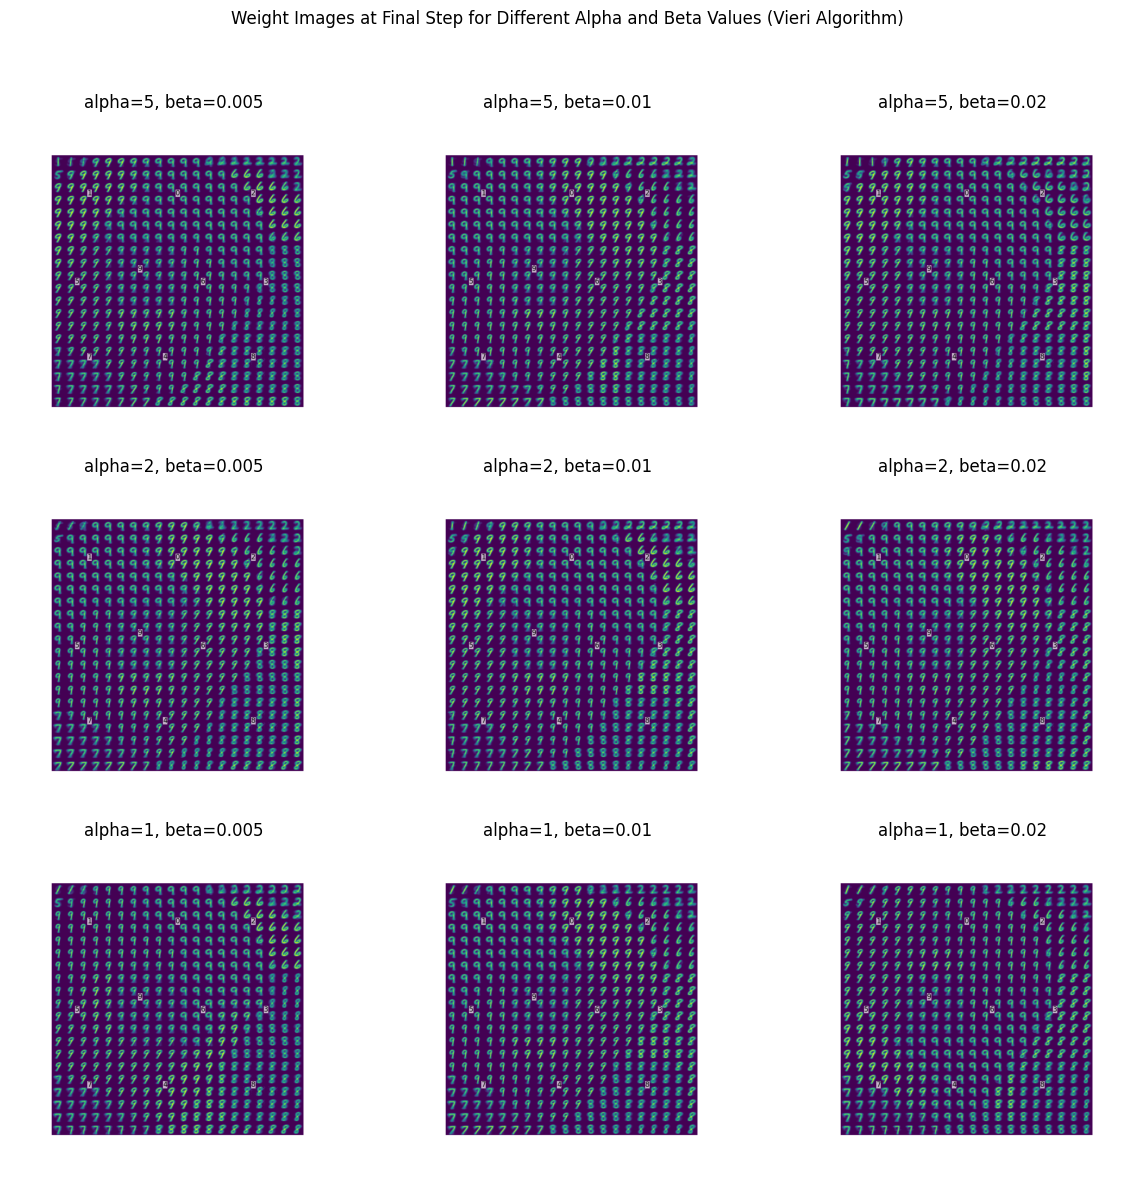

Weight images grid saved as 'weight_images_grid.png'


In [62]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define alphas and betas
alphas = [5, 2, 1]
betas = [0.005, 0.01, 0.02]

download_dir=".\\downaloads"

# Initialize API
api = wandb.Api()

# Set entity and project
entity = "replearn"
project = "STM-MNIST"

# Create a 3x3 grid of subplots for weight images
fig, axes = plt.subplots(len(alphas), len(betas), figsize=(12, 12), sharex=True, sharey=True)
fig.suptitle("Weight Images at Final Step for Different Alpha and Beta Values (Vieri Algorithm)")

# Iterate over alphas and betas to populate each subplot
for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        # Define filters for current alpha and beta
        filters = {
            "config.BETA": beta,
            "config.ALPHA": alpha,
            "config.SIGMA_BASELINE": 2,
            "config.MODE": "STC",
            "state": "finished"
        }
        
        # Fetch the runs that match the filters
        runs = api.runs(
            path=f"{entity}/{project}",
            filters=filters,
            order="-created_at"
        )
        
        # Use only the first run that matches the filters
        for run in runs:
            # Collect weight data at the last step (assuming it's stored in 2D format)
            history_weights = run.scan_history(keys=["weights"], page_size=1000, min_step=0, max_step=2000)

            weights_metadata = [row["weights"] for row in history_weights]

            if weights_metadata:
                # Access the image path for the weights
                weight_img_path = weights_metadata[-1]["path"]
                
                # Download the image file
                local_img_path = os.path.join(download_dir, os.path.basename(weight_img_path))
                run.file(weight_img_path).download(root=download_dir, replace=True)

                # Load the image and display it in the subplot
                weight_img = mpimg.imread(download_dir+"\\"+weight_img_path)
                ax = axes[i, j]
                ax.imshow(weight_img, cmap="viridis")
                ax.set_title(f"alpha={alpha}, beta={beta}")
                ax.axis("off")  # Hide axes for image display

            # Break after the first matching run
            break

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
plt.savefig("weight_images_grid_Vieri.png", dpi=300)
plt.show()

# Optional: Clean up by removing downloaded images
import shutil
shutil.rmtree(download_dir)

print("Weight images grid saved as 'weight_images_grid.png'")

In [ ]:

a=input("this will delete some run. Are you sure? (Yes)")
if a=="Yes":
	alphas = [5, 2, 1]
	betas = [0.005, 0.01, 0.02]
	api = wandb.Api()
	entity = "replearn"
	project = "STM-MNIST"
	for i, alpha in enumerate(alphas):
		for j, beta in enumerate(betas):
			filters = {
				"config.BETA": beta,
				"config.ALPHA": alpha,
				"config.SIGMA_BASELINE": 1.5,
				"state": "finished"
			}
			runs = api.runs(
				path=f"{entity}/{project}",
				filters=filters,
				order="-created_at"
			)
			for run in runs:
				run.delete()

IndentationError: expected an indented block after 'if' statement on line 2 (1555246591.py, line 5)